In [1]:
import distract
import finetune
import importlib
import matplotlib.pyplot as plt
import numpy as np
importlib.reload(distract)
importlib.reload(finetune)

finetune.NUM_CLASSES = 196
finetune.CLASSIFIER_NAME = 'resnet'
finetune.NUM_EPOCHS = 15
finetune.FEATURE_EXTRACT = False
finetune.DATASET = 'FGVC-Aircraft'
classifier = finetune.initialize_model()
# classifier, hist = finetune.finetune_model(classifier)

In [2]:
importlib.reload(distract)
distractor = distract.initialize_distractor(classifier)
print(distractor)

GumbelDistractor(
  (cnns): ModuleList(
    (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)


In [ ]:
importlib.reload(distract)

baseline_loss, distractor_loss = distract.train_distractor(distractor, classifier)

epoch: 0, phase: val:   4%|▍         | 16/417 [00:06<02:42,  2.47it/s, avg_baseline_loss=0.245, avg_distractor_loss=0.141]

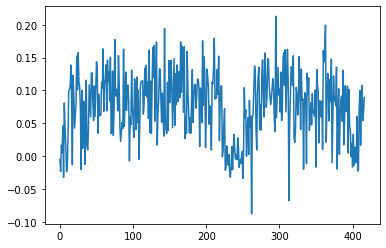

In [6]:
loss_differences = np.array([l.cpu().item() for l in baseline_loss['train']]) - np.array([l.cpu().item() for l in distractor_loss['train']])
plt.plot(loss_differences)
# plt.plot([l.cpu().data.numpy() for l in distractor_loss['train']], 'r')
# plt.plot(distractor_loss, 'r')
plt.show()

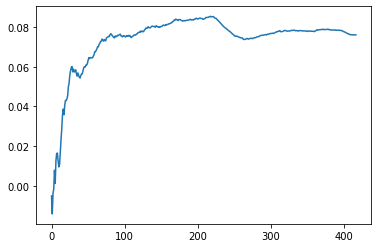

In [7]:
plt.plot([sum(l)/len(l) for l in [loss_differences[:i+1] for i in range(len(loss_differences))]])

In [17]:
next_baseline_loss, next_distractor_loss = distract.train_distractor(distractor, classifier)

100%|██████████| 417/417 [02:29<00:00,  2.79it/s, running_avg_baseline_loss=0.256, running_avg_distractor_loss=0.194]


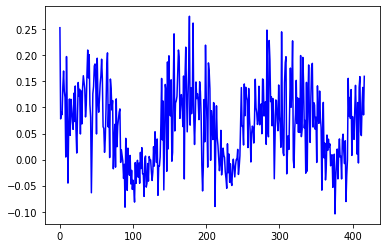

In [18]:
plt.plot(np.array([l.cpu().item() for l in next_baseline_loss['train']]) - np.array([l.cpu().item() for l in next_distractor_loss['train']]), 'b')
# plt.plot([l.cpu().data.numpy() for l in distractor_loss['train']], 'r')
# plt.plot(distractor_loss, 'r')
plt.show()